In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso,Ridge
from sklearn import metrics

In [4]:
df = pd.read_csv('C:/Users/maity/OneDrive/Desktop/xyz/steel.csv')

In [6]:
df.shape

(35040, 11)

In [7]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01-01-2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01-01-2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01-01-2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01-01-2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01-01-2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [8]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [9]:
df = df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh':'Lagging_Currenr_Reactive_Power_kVarh', 'CO2(tCO2)': 'CO2'})


In [10]:
df.describe()

,Usage_kWh,Lagging_Currenr_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Currenr_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [12]:
df.corr()

,Usage_kWh,Lagging_Currenr_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Currenr_Reactive_Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


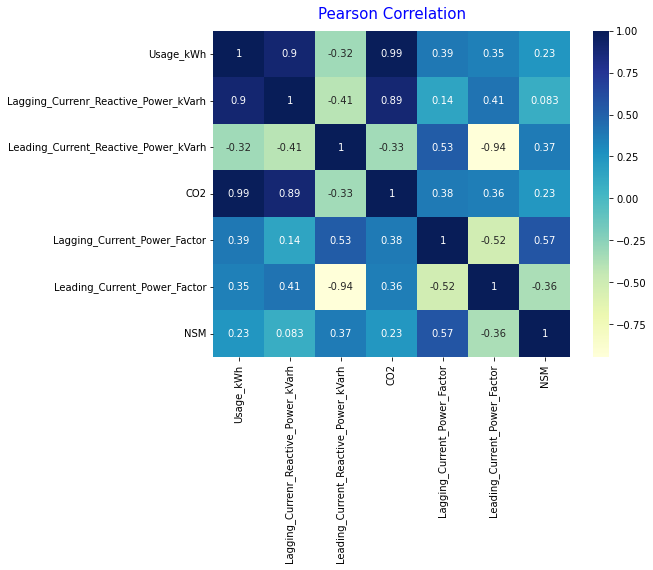

In [15]:
import seaborn as sns
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Pearson Correlation" , fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

In [17]:
most_energy_consumption = pd.pivot_table(df,index = 'date', values = 'Usage_kWh', aggfunc= {'Usage_kWh': np.max})
most_energy_consumption.head(10)

,Usage_kWh
date,
01-01-2018 00:00,3.42
01-01-2018 00:15,3.17
01-01-2018 00:30,4.00
01-01-2018 00:45,3.24
01-01-2018 01:00,3.31
01-01-2018 01:15,3.82
01-01-2018 01:30,3.28
01-01-2018 01:45,3.60
01-01-2018 02:00,3.60


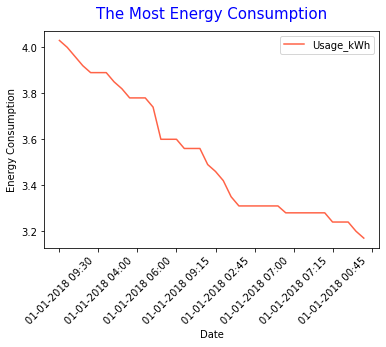

In [18]:
chart = most_energy_consumption[:40].sort_values(by = 'Usage_kWh', ascending = False).plot(kind = 'line', color = 'tomato')
chart.set_xticklabels(chart.get_xticklabels(),rotation = 45)
plt.title('The Most Energy Consumption', fontsize = 15, color = 'b', loc = 'center', pad = 12)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

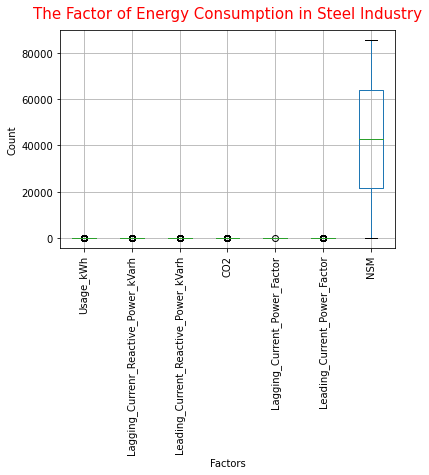

In [22]:
chart = df.boxplot(column = ['Usage_kWh', 'Lagging_Currenr_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                    'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'r', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

In [23]:
pd.pivot_table(df,index = ['Load_Type','Day_of_week','WeekStatus'],values = ['NSM', 'Usage_kWh'],
              aggfunc ={'NSM':np.mean,'Usage_kWh':np.mean})

NSM  Usage_kWh
Load_Type    Day_of_week WeekStatus                         
Light_Load   Friday      Weekday     23206.204380  11.361442
             Monday      Weekday     24026.223776   8.805459
             Saturday    Weekend     31381.843575   7.072210
             Sunday      Weekend     39144.653465   4.171106
             Thursday    Weekday     23206.204380  11.803964
             Tuesday     Weekday     24074.199288  10.510040
             Wednesday   Weekday     24074.199288  10.780560
Maximum_Load Friday      Weekday     53106.000000  61.043700
             Monday      Weekday     53106.000000  66.278233
             Saturday    Weekend     52492.105263  41.529605
             Sunday      Weekend     52826.470588  29.195662
             Thursday    Weekday     53106.000000  64.522758
             Tuesday     Weekday     53176.530612  66.023359
             Wednesday   Weekday     53176.530612  62.358359
Medium_Load  Friday      Weekday     61758.000000  42.220494
             Monday      Weekday     61758.000000  43.097231
             Saturday    Weekend     62218.421053  17.547648
             Sunday      Weekend     61967.647059  16.368934
             Thursday    Weekday     61758.000000  44.986200
             Tuesday     Weekday     61705.102041  45.020797
             Wednesday   Weekday     61705.102041  40.462379

Text(0, 0.5, 'Energy Consumption')

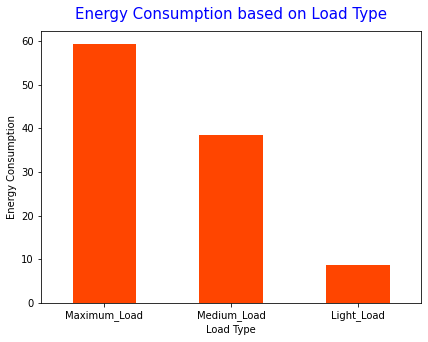

In [26]:
#1.Visualize Energy based on Load type
plt.rcParams['figure.figsize']=(15,5)
plt.subplot(1,2,1)
chart = df.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0 )
plt.title('Energy Consumption based on Load Type', fontsize = 15,color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption')

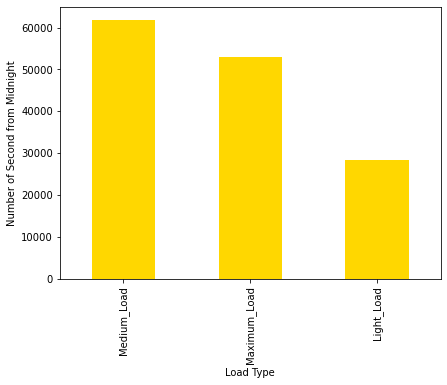

In [27]:
plt.subplot(1,2,2)
chart = df.groupby('Load_Type')['NSM'].mean().sort_values(ascending = False).plot(kind ='bar', color = 'gold')
plt.xlabel('Load Type')
plt.ylabel('Number of Second from Midnight')
plt.show()

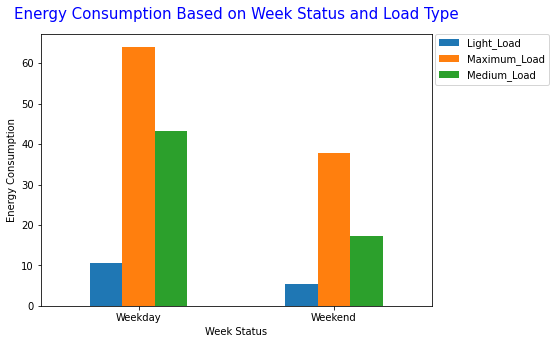

In [29]:
plt.rcParams['figure.figsize'] = (7,5)
chart = df.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0 )
plt.title('Energy Consumption Based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.3,1), borderaxespad = 0 )
plt.show()

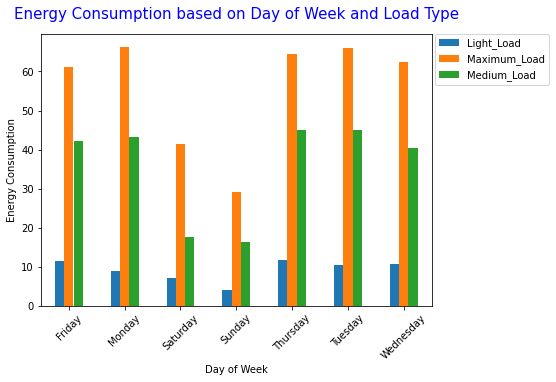

In [30]:
#Charts based on Day of week and load type
chart  = df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Energy Consumption based on Day of Week and Load Type', fontsize = 15,pad = 15,color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.01,1), borderaxespad = 0 )
plt.show()

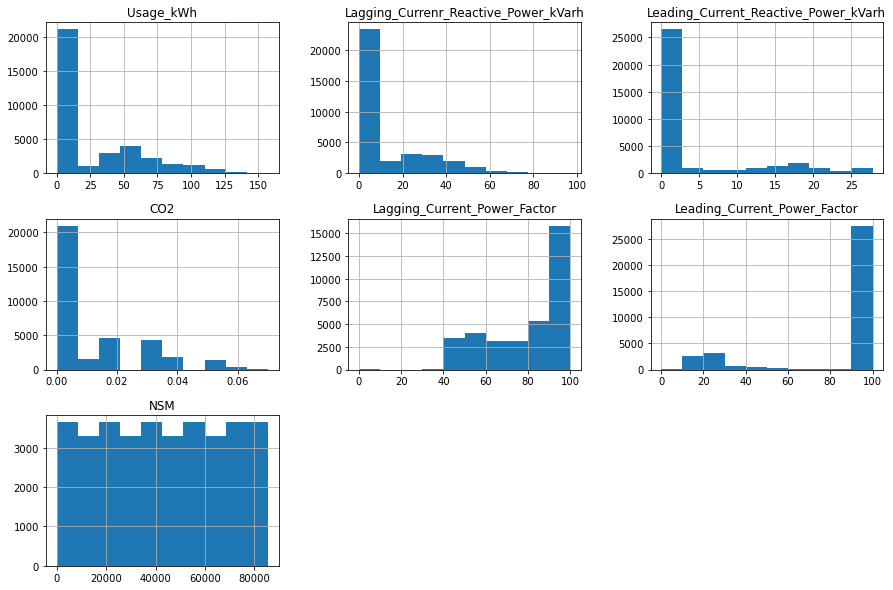

In [31]:
df.hist(figsize = (15,10))
plt.show()

In [32]:
#Regression Model
df = df.set_index('date')
df = pd.get_dummies(df,drop_first = True)
df.head()

,Usage_kWh,Lagging_Currenr_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,
01-01-2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
01-01-2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
01-01-2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
01-01-2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
01-01-2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [33]:
X = df.drop('Usage_kWh',axis = 1)
y = df['Usage_kWh']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(24528, 15)
(24528,)
(10512, 15)
(10512,)


In [34]:
lr = LinearRegression()
%time lr.fit(X_train,y_train)
lr.score(X_test,y_test)

Wall time: 70.5 ms


0.9841681626773711

In [35]:
#Ridge Regression Model
ridge = Ridge(alpha = 0.5)
%time ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

Wall time: 23 ms


0.9683613861527713

In [36]:
#Lasso Regression Model
lasso = Lasso(alpha=0.5)
%time lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

Wall time: 49 ms


0.9098749972992153

In [37]:
y_pred = lr.predict(X_test)
print(y_pred)

[  3.09659745  70.15826234 124.42399214 ...   2.22293667   1.54271064
   3.94845762]


In [38]:
#Check MAE , MSE and RMSE
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error :' , math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error :  2.5519176087483
Mean Squared Error :  17.76938905135699
Root Mean Squared Error : 4.2153753155984806


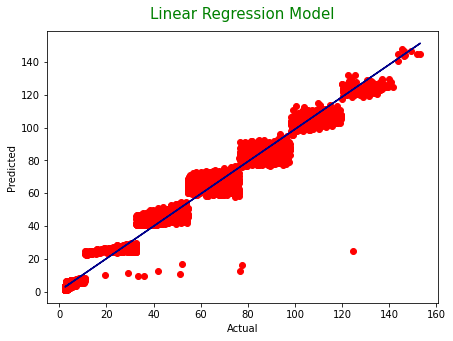

In [39]:
#Visualise the regression
x = y_test
y = y_pred
plt.title('Linear Regression Model' , fontsize = 15, color = 'g',pad = 12)
plt.plot(x,y,'o',color = 'r')
m,b = np.polyfit(x,y,1)
plt.plot(x,m*x + b,color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()